<a href="https://colab.research.google.com/github/apetresc/rotman-api/blob/master/Day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breadth-First Traversal

Consider the graph below:

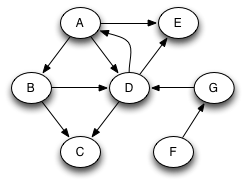



In [ ]:
def bft(g, root):
  seen = set()
  q = [root]

  while q:
    n = q.pop(0)
    if n not in seen:
      print(n)
      seen.add(n)
      q += g[n]

In [ ]:
GRAPH = {
  'A': ['B', 'E'],
  'B': ['C', 'D'],
  'C': [],
  'D': ['A', 'C', 'E'],
  'E': [],
  'F': ['G'],
  'G': ['D']
}

ROOT_NODE = 'F'

In [ ]:
bft(GRAPH, ROOT_NODE)

In our analogy, a website domain is very similar to a graph. Each node is a page, and each edge is a link from one page pointing to another.

Usually, when dealing with large sites, we don't have a complete picture of the graph ahead of time (or it may not even exist - most interesting content is dynamic these days). Luckily, breadth-first search doesn't require **global** knowledge of the graph. It just needs a starting point, and a way to extract edges from each page as we visit it. That's exactly what we're prepared to do!

In [ ]:
import requests
from bs4 import BeautifulSoup
import time
import urllib.parse as urlparse

In [ ]:
def get_links(html):
  soup = BeautifulSoup(html, 'html.parser')
  return [urlparse.urljoin(DOMAIN, a["href"]) for a in soup.find(id="content").find_all('a') if a.get("href") and a["href"].startswith('/')]

def visit(url):
  html = requests.get(url).content
  print(url)
  return html

def bft(root, max_visits=50):
  seen = set()
  q = [root]

  while q and len(seen) < max_visits:
    n = q.pop(0)
    if n not in seen:
      html = visit(n)
      seen.add(n)
      q += get_links(html)
    time.sleep(1)

In [ ]:
DOMAIN = "https://en.wikipedia.org/"
ROOT_NODE = "https://en.wikipedia.org/wiki/Star_Wars"

bft(ROOT_NODE)

How can we turn each "visit" into something more useful than a plain URL? By simply combining it with the parsing knowledge we gained last time.

In [ ]:
def visit(url):
  html = requests.get(url).content
  soup = BeautifulSoup(html, 'html.parser')
  print('\n'.join(p.get_text() for p in soup.find(id="content").find_all('p')))
  return html

In [ ]:
bft(ROOT_NODE)